In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import json
from yellowbrick.classifier import ConfusionMatrix

In [176]:
df = pd.read_csv('./credit_risk.csv')

In [177]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

le = LabelEncoder()

for i in range(X.shape[1]):
    X[:, i] = le.fit_transform(X[:, i])

X.shape, y.shape

((14, 4), (14,))

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
model = RandomForestClassifier(n_estimators=70, criterion='log_loss', random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=70, random_state=0)

In [180]:
y_pred = model.predict(X_test)

0.6666666666666666

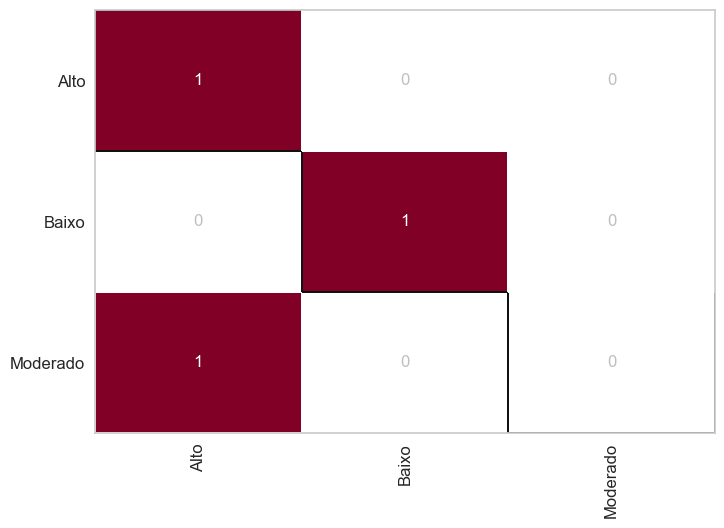

In [181]:
cm = ConfusionMatrix(model, classes=model.classes_)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [182]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Alto       0.50      1.00      0.67         1
       Baixo       1.00      1.00      1.00         1
    Moderado       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



/Users/elioenai.ferrari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elioenai.ferrari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elioenai.ferrari/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [183]:
prediction = model.predict([[1, 1, 0, 2]])
print(prediction)

['Moderado']
